# Farmtech na Era da Cloud Computing - Cap. 1 - Fase 5
Nesta parte da atividade foi desenvolvido uma **análise exploratória dos dados**, clusterizações, identificação de outliers e desenvolvimento de modelos preditivos que preve o rendimento da safra no dataset explorado.


Conectando o caminho do dataset diretamente do Drive.

In [ ]:
dataset = "/content/drive/MyDrive/Colab Notebooks/FIAP/atividade1-fase5/crop_yield.csv"

Definindo o código para conexão com o Google Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Importantos as libs necessárias.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

### Análise exploratória dos dados

Sabendo a **dimensão** do nosso dataset.

In [ ]:
df_crop_yield = pd.read_csv(dataset)

df_crop_yield.shape

(156, 6)

Definindo a variável do dataframe e **exibindo as 5 primeiras linhas** e **as últimas 5 linhas** do df.



In [ ]:
df_crop_yield.head()

,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
0,"Cocoa, beans",2248.92,17.72,83.40,26.01,11560
1,"Cocoa, beans",1938.42,17.54,82.11,26.11,11253
2,"Cocoa, beans",2301.54,17.81,82.79,26.24,9456
3,"Cocoa, beans",2592.35,17.61,85.07,25.56,9321
4,"Cocoa, beans",2344.72,17.61,84.12,25.76,8800


In [ ]:
df_crop_yield.tail()

,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
151,"Rubber, natural",2308.51,18.27,83.65,26.47,6721
152,"Rubber, natural",2410.13,18.58,83.45,26.81,6248
153,"Rubber, natural",2967.41,18.67,85.48,26.46,6842
154,"Rubber, natural",2333.46,18.50,84.85,26.43,5571
155,"Rubber, natural",2109.34,18.51,83.52,26.72,5903


Obtém **informações gerais** de cada coluna.

In [ ]:
df_crop_yield.describe()

,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
count,156.000000,156.000000,156.000000,156.00000,156.000000
mean,2486.498974,18.203077,84.737692,26.18359,56153.096154
std,289.457914,0.293923,0.996226,0.26105,70421.958897
min,1934.620000,17.540000,82.110000,25.56000,5249.000000
25%,2302.990000,18.030000,84.120000,26.02000,8327.750000
50%,2424.550000,18.270000,84.850000,26.13000,18871.000000
75%,2718.080000,18.400000,85.510000,26.30000,67518.750000
max,3085.790000,18.700000,86.100000,26.81000,203399.000000


Verifica colunas que possui **valores nulos**.

In [ ]:
df_crop_yield.notnull()

,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
151,True,True,True,True,True,True
152,True,True,True,True,True,True
153,True,True,True,True,True,True
154,True,True,True,True,True,True


Verificando a porcentagem distribuidas da coluna **"Crop"**.


In [ ]:
(df_crop_yield["Crop"].value_counts(normalize=True) * 100).reset_index(name="Percentual")

,Crop,Percentual
0,"Cocoa, beans",25.0
1,Oil palm fruit,25.0
2,"Rice, paddy",25.0
3,"Rubber, natural",25.0


Conta **se há colunas nulas**.

In [ ]:
df_crop_yield.isnull().sum()

,0
Crop,0
Precipitation (mm day-1),0
Specific Humidity at 2 Meters (g/kg),0
Relative Humidity at 2 Meters (%),0
Temperature at 2 Meters (C),0
Yield,0


Conta as colunas **duplicadas**.

In [ ]:
df_crop_yield.duplicated().sum()

np.int64(0)

Verificando a **média** da coluna "Crop".

In [ ]:
media_cultivo_df = df_crop_yield.groupby(["Crop"]).mean()
media_cultivo_df

,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
Crop,,,,,
"Cocoa, beans",2486.498974,18.203077,84.737692,26.18359,8883.128205
Oil palm fruit,2486.498974,18.203077,84.737692,26.18359,175804.692308
"Rice, paddy",2486.498974,18.203077,84.737692,26.18359,32099.666667
"Rubber, natural",2486.498974,18.203077,84.737692,26.18359,7824.897436



### Identificando Outliers

Após uma breve análise exploratória, vamos tentar identificar os outliers do nosso dataset.

Utilizando o gráfico **Boxplot** para identificar outliers.

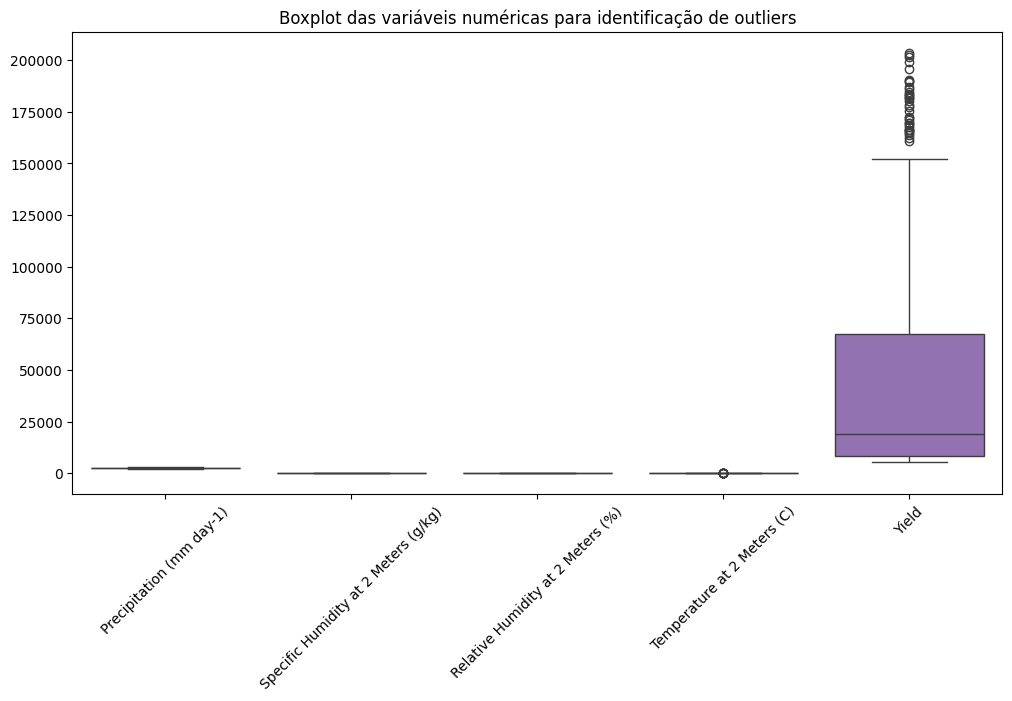

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_crop_yield.select_dtypes(include=['number']))
plt.xticks(rotation=45)
plt.title("Boxplot das variáveis numéricas para identificação de outliers")
plt.show()

O **rendimento (Yield)** apresenta vários valores discrepantes bem acima do intervalo interquartil, o que pode indicar cenários anômalos ou culturas com produtividade extremamente alta.

As outras variáveis não mostram outliers tão evidentes, exceto um leve caso na temperatura.

Usando a **Matriz de Correlação Visual** para entender os padrões, utilizando Seaborn.




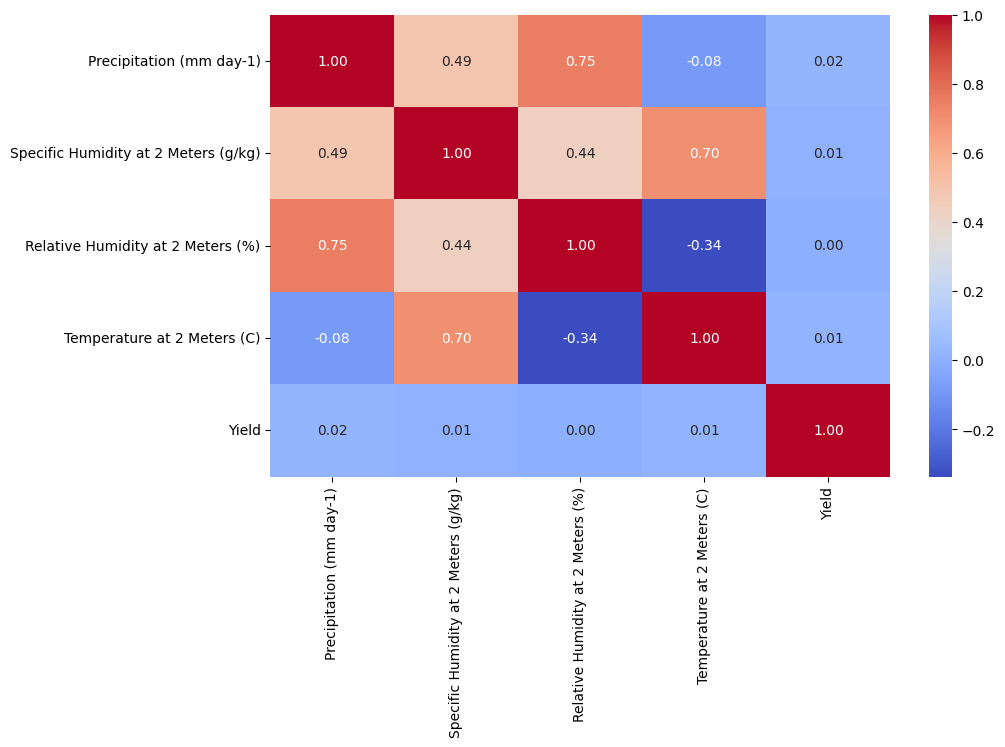

In [ ]:
df_apenas_numericos = df_crop_yield.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(df_apenas_numericos.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

**Forte correlação entre:**

* Precipitação e Umidade Relativa (0.75): Quanto mais chuva geralmente aumenta a umidade relativa.

* Temperatura e Umidade Específica (0.70): O ar quente pode reter mais vapor d'água.

**Correlação Fraca com o Rendimento:**

* Nenhuma variável apresenta uma correlação forte com o rendimento (Yield), o que sugere que outros fatores podem estar influenciando a produtividade das safras.

Utilizando a regra do **IQR (Intervalo Interquatil)** para remover outliers.

In [ ]:
variaveis_importantes = ["Precipitation (mm day-1)",
                         "Temperature at 2 Meters (C)",
                         "Relative Humidity at 2 Meters (%)",
                         "Specific Humidity at 2 Meters (g/kg)",
                         "Yield"]

df_filtrado = df_crop_yield.copy()

for coluna in variaveis_importantes:
    Q1 = df_filtrado[coluna].quantile(0.25)
    Q3 = df_filtrado[coluna].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    df_filtrado = df_filtrado[df_filtrado[coluna].between(limite_inferior, limite_superior)]

df_filtrado.shape
df_filtrado

,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
0,"Cocoa, beans",2248.92,17.72,83.40,26.01,11560
2,"Cocoa, beans",2301.54,17.81,82.79,26.24,9456
5,"Cocoa, beans",2339.30,17.70,84.54,25.76,8850
6,"Cocoa, beans",2326.09,18.09,84.63,26.11,9003
7,"Cocoa, beans",2718.08,18.30,85.43,26.12,9880
...,...,...,...,...,...,...
150,"Rubber, natural",2604.59,18.19,83.44,26.43,6275
151,"Rubber, natural",2308.51,18.27,83.65,26.47,6721
153,"Rubber, natural",2967.41,18.67,85.48,26.46,6842
154,"Rubber, natural",2333.46,18.50,84.85,26.43,5571


### Fazendo a Clusterização dos Dados
É necessário fazer a clusterização dos dados para agruparmos dados semelhantes para identificar padrões.

Primeiro vamos normalizar os dados.

In [ ]:
variaveis_importantes = ["Precipitation (mm day-1)",
                         "Relative Humidity at 2 Meters (%)",
                         "Temperature at 2 Meters (C)",
                         "Yield"
                         ]

scaler = RobustScaler()
X_scaled = scaler.fit_transform(df_filtrado[variaveis_importantes])

Usando o **método do cotovelo** para identificarmos o melhor número de clusters.

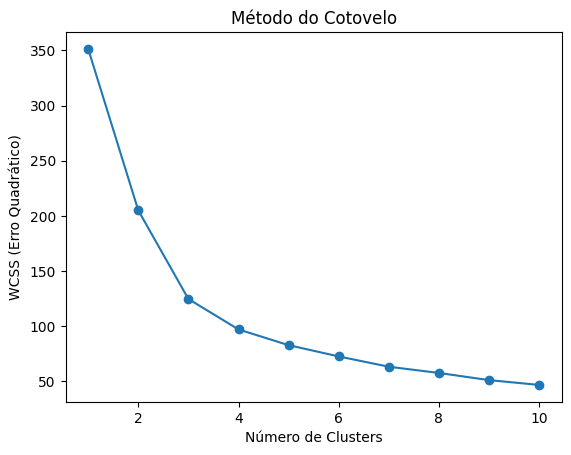

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker="o")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS (Erro Quadrático)")
plt.title("Método do Cotovelo")
plt.show()

Utilizando o **coeficiente de silhueta** para avaliar a clusterização dos dados.

Segundo o coeficiente de silhueta, **o melhor número de clusters são 2**.

In [ ]:
for i in range(2, 6):  # Evita testar com apenas 1 cluster
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, labels)
    print(f"Número de clusters: {i} - Coeficiente de Silhueta: {silhouette_avg:.4f}")

Número de clusters: 2 - Coeficiente de Silhueta: 0.7111
Número de clusters: 3 - Coeficiente de Silhueta: 0.3675
Número de clusters: 4 - Coeficiente de Silhueta: 0.3615
Número de clusters: 5 - Coeficiente de Silhueta: 0.3259


Aplicando o **KMeans** com o número de clusters definido para definir dados semelhantes.

Foi testado com outros algoritmos de clusterização, como: DBSCAN, Agglomerative Clustering, MeanShift, Spectral Clustering e Gaussian Mixture Model. Mas o algoritmo que se desempenhou melhor foi o **KMeans**.

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df_filtrado.loc[:, "Cluster"] = kmeans.fit_predict(X_scaled)

### Conclusão da Clusterização
O gráfico exibe a clusterização dos rendimentos agrícolas com base em duas variáveis:

- Eixo X: Precipitação (mm/dia) → Representa a quantidade de chuva por dia.

- Eixo Y: Umidade Relativa (%) → Mede a umidade do ar próxima à superfície.

Os pontos representam as observações da base de dados, categorizadas em clusters distintos, indicados por cores e estilos diferentes.

***Interpretação***

1. Distribuição: Há uma tendência de aumento na umidade relativa à medida que a precipitação aumenta, sugerindo uma relação positiva entre essas variáveis.

2. Clusters: O algoritmo de clusterização agrupou os pontos em duas categorias distintas (Cluster 0 e Cluster 1). Isso indica padrões diferentes de comportamento nos dados.

3. Impacto do RobustScaler: O uso do RobustScaler melhorou o desempenho da clusterização, reduzindo a influência de outliers nos dados.

***Padrões Identificados:***

- Existe uma **relação ascendente** entre precipitação e umidade, indicando que locais com maior precipitação tendem a ter uma umidade relativa maior.
- A separação clara dos clusters sugere **duas condições climáticas distintas**, o que pode impactar diretamente a produtividade das safras.

***Conclusão:***

O gráfico sugere que a precipitação e a umidade relativa são fatores que podem influenciar o rendimento da safra e que existem padrões distintos nesses dados.

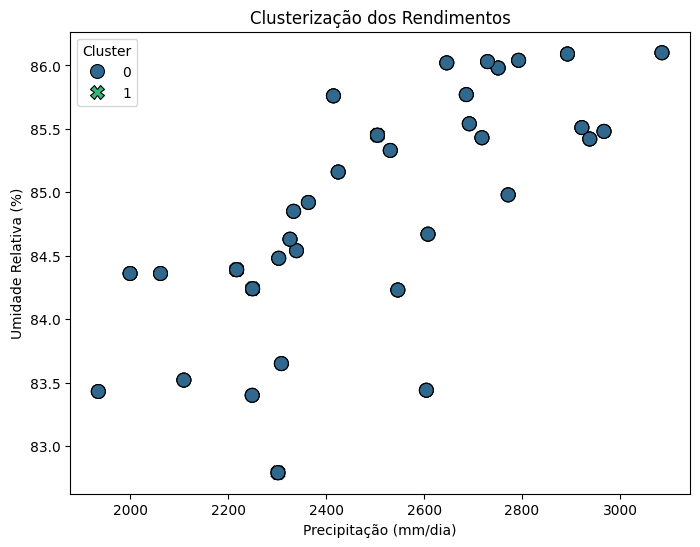

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_filtrado["Precipitation (mm day-1)"],
                y=df_filtrado["Relative Humidity at 2 Meters (%)"],
                hue=df_filtrado["Cluster"],
                palette="viridis",
                style=df_filtrado["Cluster"],
                s=100, edgecolor="black")

plt.xlabel("Precipitação (mm/dia)")
plt.ylabel("Umidade Relativa (%)")
plt.title("Clusterização dos Rendimentos")
plt.legend(title="Cluster")
plt.show()

## Desenvolvendo os Modelos Preditivos
Agora vamos desenvolver 5 tipos de modelos preditivos para prever o rendimento da safra.

Foi usado os seguintes modelos:
- Ridge;
- Regressão Linear;
- Árvore de Regressão;
- Floresta de Regressão;
- KNN de Regressão;
- SVR;
- GradientBoostingRegressor;

Padronizando os dados com o **RobustScaler.**

In [ ]:
X = df_filtrado.drop(['Yield', 'Crop'], axis=1)
y = df_filtrado['Yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
ridge_model = Ridge(alpha=0.01, fit_intercept=True, solver='auto')
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

print("Ridge Regressão")
print("Erro Quadrático Médio:", mean_squared_error(y_test, y_pred_ridge))
print("R-quadrado:", r2_score(y_test, y_pred_ridge))

Ridge Regressão
Erro Quadrático Médio: 122144298.32697888
R-quadrado: 0.8185426663013484


In [ ]:
linear_model = LinearRegression(fit_intercept=True, copy_X=False, n_jobs=-1)
linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)
print("Regressão Linear")
print("Erro Quadrático Médio:", mean_squared_error(y_test, y_pred_linear))
print("R-quadrado:", r2_score(y_test, y_pred_linear))

Regressão Linear
Erro Quadrático Médio: 122290747.062192
R-quadrado: 0.8183251023431506


In [ ]:
arvore_decisao = DecisionTreeRegressor(max_depth=1, min_samples_split=2, min_samples_leaf=10, random_state=42)
arvore_decisao.fit(X_train, y_train)
y_pred_arvore = arvore_decisao.predict(X_test)

print("Árvore de Decisão")
print("Erro Quadrático Médio:", mean_squared_error(y_test, y_pred_arvore))
print("R-quadrado:", r2_score(y_test, y_pred_arvore))

Árvore de Decisão
Erro Quadrático Médio: 672848334.5577886
R-quadrado: 0.0004178136453625303


In [ ]:
floresta_aleatoria = RandomForestRegressor(n_estimators=100, max_depth=4, min_samples_split=2, min_samples_leaf=1, random_state=42)
floresta_aleatoria.fit(X_train, y_train)

y_pred_floresta = floresta_aleatoria.predict(X_test)
print("Floresta Aleatória")
print("Erro Quadrático Médio:", mean_squared_error(y_test, y_pred_floresta))
print("R-quadrado:", r2_score(y_test, y_pred_floresta))

Floresta Aleatória
Erro Quadrático Médio: 153630569.75846714
R-quadrado: 0.771766722271811


In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=1, weights='uniform', algorithm='brute', p=1)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)
print("K-Nearest Neighbors")
print("Erro Quadrático Médio:", mean_squared_error(y_test, y_pred_knn))
print("R-quadrado:", r2_score(y_test, y_pred_knn))

K-Nearest Neighbors
Erro Quadrático Médio: 305277943.09375
R-quadrado: 0.5464796773197795


In [ ]:
svr_model = SVR(kernel='sigmoid', C=1.0, epsilon=0.4, gamma='scale')
svr_model.fit(X_train, y_train)

y_pred_svr = svr_model.predict(X_test)
print("Support Vector Regression")
print("Erro Quadrático Médio:", mean_squared_error(y_test, y_pred_svr))
print("R-quadrado:", r2_score(y_test, y_pred_svr))

Support Vector Regression
Erro Quadrático Médio: 771689948.3258816
R-quadrado: -0.14642109687682048


In [ ]:
gb_model = GradientBoostingRegressor(min_samples_split=10, learning_rate=0.03, random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting")
print("Erro Quadrático Médio:", mean_squared_error(y_test, y_pred_gb))
print("R-quadrado:", r2_score(y_test, y_pred_gb))

Gradient Boosting
Erro Quadrático Médio: 161125501.8639315
R-quadrado: 0.7606322656108111


## Conclusão

Os gráficos mostra **a relação entre os valores reais** e as **previsões de rendimento do modelo de Regressão Linear** e o **modelo Ridge Regression**. Embora a maioria das previsões esteja próxima dos valores reais, há um ponto fora da curva, indicando um possível outlier ou uma limitação do modelo.

O uso do RobustScaler **ajudou a minimizar o impacto dos outliers**. No geral, os modelos de Regressão Linear e Ridge Regression apresentaram desempenho estável, mantendo um coeficiente de determinação (R²) **acima de 80%**.

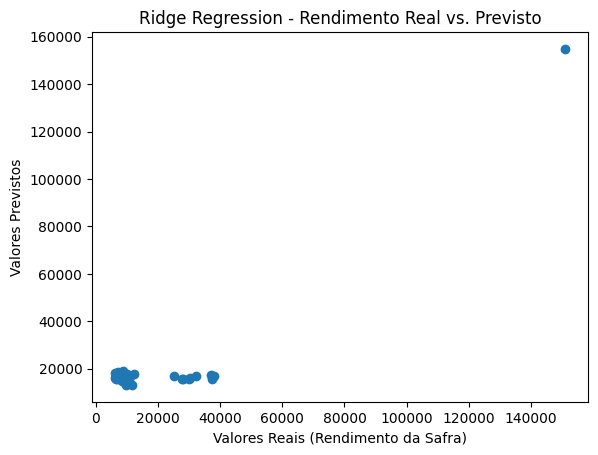

In [ ]:
plt.scatter(y_test, y_pred_linear)
plt.xlabel("Valores Reais (Rendimento da Safra)")
plt.ylabel("Valores Previstos")
plt.title("Ridge Regression - Rendimento Real vs. Previsto")
plt.show()

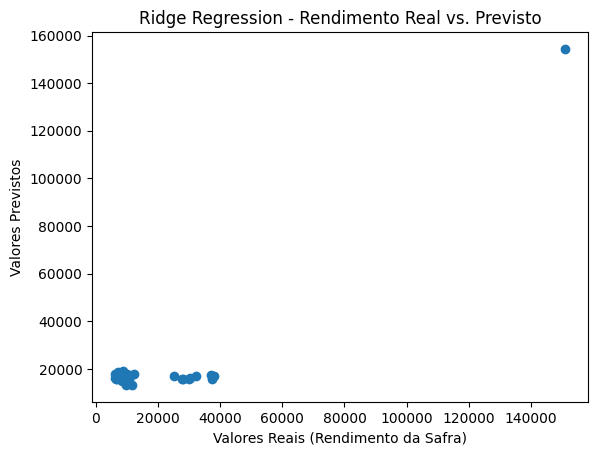

In [ ]:
plt.scatter(y_test, y_pred_ridge)
plt.xlabel("Valores Reais (Rendimento da Safra)")
plt.ylabel("Valores Previstos")
plt.title("Ridge Regression - Rendimento Real vs. Previsto")
plt.show()